<a href="https://colab.research.google.com/github/HazemHassine/Machine-Learning-Components/blob/master/K_means_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import warnings
# warnings.filterwarnings("ignore")

In [ ]:
foo = np.array([[0.0, 10.0], [0.13216, 12.11837], [0.25379, 42.05027], [0.30874, 13.11784]])
def minmax_array(arr):
  max = np.max(arr)
  min = np.min(arr)
  return (arr - min) / (max - min)
minmax_array(foo)

array([[0.        , 0.2378106 ],
       [0.0031429 , 0.28818769],
       [0.0060354 , 1.        ],
       [0.00734216, 0.31195614]])

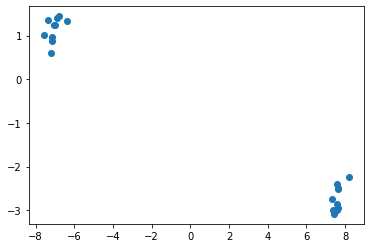

[1 1 0 0 1 0 1 1 1 1 0 1 0 0 0 1 0 1 0 0]


In [ ]:
features, clusters = make_blobs(n_samples = 20,
n_features = 2, 
centers = 2,
cluster_std = 0.3,
shuffle = True)

df = pd.DataFrame(features)
df.head()

plt.scatter(features[:,0], features[:,1])
plt.show()
print(clusters)

In [ ]:
features.shape
print(features[:3])

[[-6.79841097  1.4441944 ]
 [-7.21453262  0.60489898]
 [ 7.62181481 -2.95569782]]


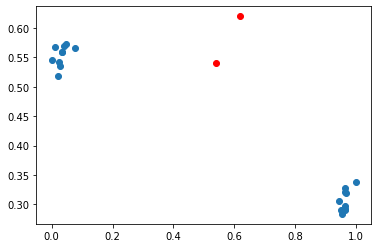

18.54408470830419


In [ ]:
class K_Means_Cluster:
  def __init__(self,k=3):
    self.k = k

  def calculate_distance(self,x1,x2):
    # euclidean distance
    return np.sqrt(np.sum((x1-x2)**2))

  def calculate_sum_of_distances(self, X, x1):
    sd = 0
    return np.sum(np.array([self.calculate_distance(x, x1) for x in X]))

  def center(self, x):
    return np.sum(x) / len(x)

  def SSE(self, points_clustered, C):
    temp = np.array(points_clustered)
    sse = 0
    for i in range(len(C)):
      sse += np.sum(np.array(self.calculate_sum_of_distances(points_clustered[i], C[i]))**2) / temp.shape[0]
    return sse

  def compute_centroids(self, X):
    # we'll assume that the data is scaled between 0 and 1
    
    n_samples, n_features = X.shape
    C = np.random.rand(self.k, n_features)
    num_iter = 1
    hist = []
    for t in range(num_iter):
      Ck = []
      for x in X:
        Ck.append(np.argmin([self.calculate_distance(x, c) for c in C]))    
      # for j in range(len(C)):
      #   C[j] = self.center([Ck[t] if Ck[t] == j)
      Ck = np.array(Ck)
      points = [[] for _ in range(self.k)]
      for i in Ck:
        points[i].append(X[i])
      for i in range(len(points)):
        C[i] = self.center(np.array(points[i]))
  
      hist.append(self.SSE(points, C))
    return hist, C

from sklearn.preprocessing import minmax_scale

clf = K_Means_Cluster(2)
features = minmax_array(features)
hist, centers = clf.compute_centroids(features)
# x = np.array([1, 2, 3])
# y = np.array([4, 5, 6])
# clf.calculate_distance(x,y)
plt.scatter(centers[:,0], centers[:,-1], color="red")
plt.scatter(features[:,0], features[:,1])
plt.show()
print(clf.calculate_sum_of_distances(np.array([*features[:,0], *features[:,1]]), centers[0]))